In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Distance 4: We can use the Jaccard similarity and then calculate the distance with 1-similarity.

In [53]:
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


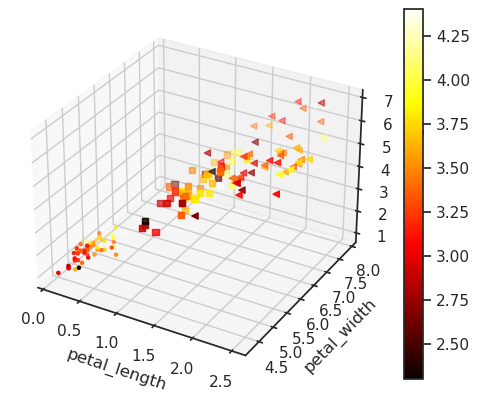

In [54]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

z1 =iris.loc[iris['species'] == 'setosa']['petal_length']
x1 =iris.loc[iris['species'] == 'setosa']['petal_width']
y1 =iris.loc[iris['species'] == 'setosa']['sepal_length']
c1 =iris.loc[iris['species'] == 'setosa']['sepal_width']

z2 =iris.loc[iris['species'] == 'versicolor']['petal_length']
x2 =iris.loc[iris['species'] == 'versicolor']['petal_width']
y2 =iris.loc[iris['species'] == 'versicolor']['sepal_length']
c2 =iris.loc[iris['species'] == 'versicolor']['sepal_width']

z3 =iris.loc[iris['species'] == 'virginica']['petal_length']
x3 =iris.loc[iris['species'] == 'virginica']['petal_width']
y3 =iris.loc[iris['species'] == 'virginica']['sepal_length']
c3 =iris.loc[iris['species'] == 'virginica']['sepal_width']


img = ax.scatter(x1, y1, z1, c=c1, cmap=plt.hot(),marker = '.')
ax.scatter(x2, y2, z2, c=c2, cmap=plt.hot(),marker = 's')
ax.scatter(x3, y3, z3, c=c3, cmap=plt.hot(),marker = '<')
fig.colorbar(img)

ax.set_xlabel('petal_length')
ax.set_ylabel('petal_width')
ax.set_zlabel('sepal_length')

plt.show()

/usr/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


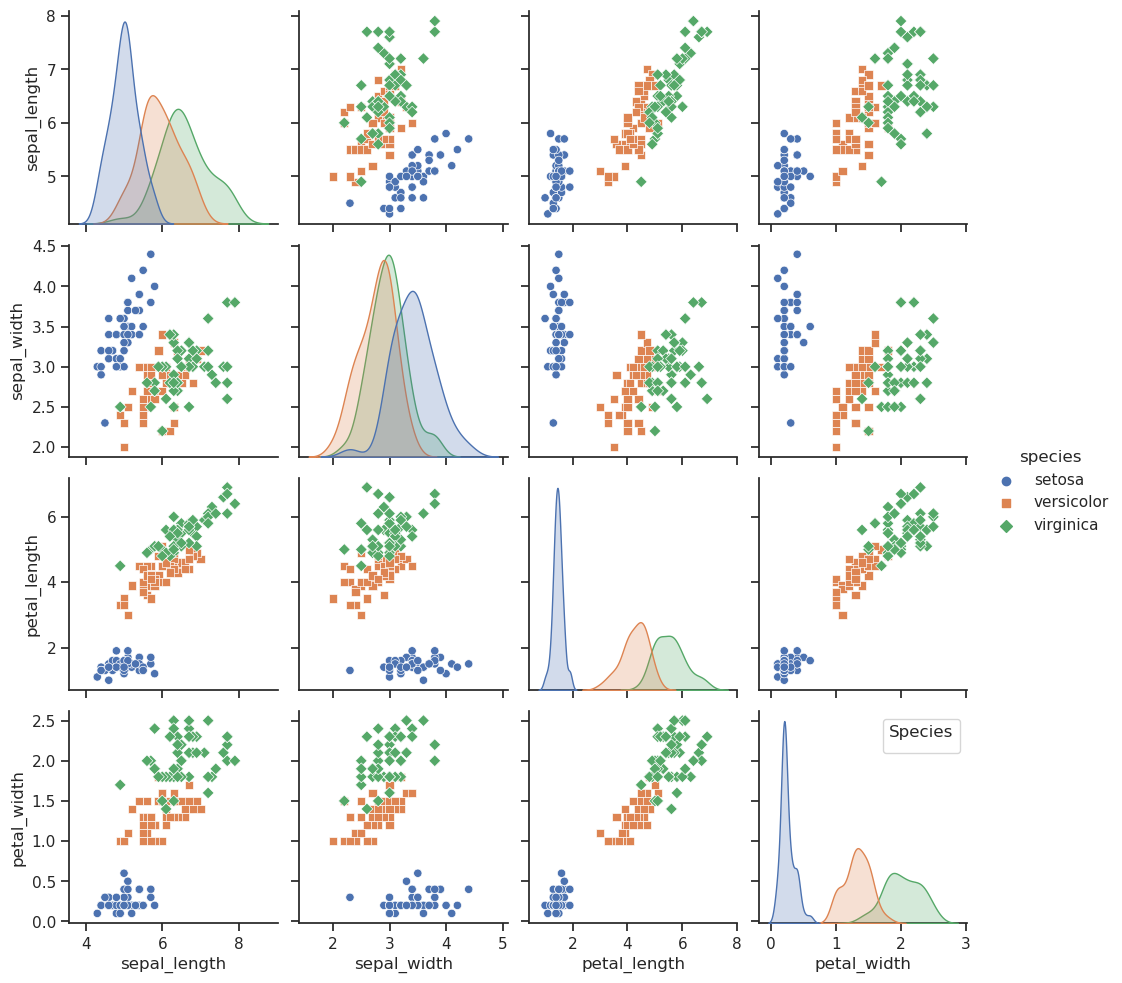

In [55]:
sns.set(style="ticks")
sns.pairplot(iris, hue="species", markers=["o", "s", "D"])

plt.legend(title="Species", loc="upper right")

plt.show()